In [1]:
from torch import nn
import torch

In [2]:
batch_size=256

In [3]:
import torchvision

In [4]:
my_transforms = torchvision.transforms.ToTensor()

In [5]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download=False, train=True, transform=my_transforms)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download=False, train=False, transform=my_transforms)

In [6]:
train_iter = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size, num_workers=4)
test_iter = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=batch_size, num_workers=4)

tensor(7)


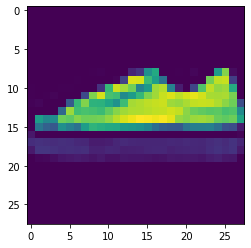

In [8]:
import matplotlib.pyplot as plt

for X, y in train_iter:
    print(y[0])
    pic = X[0]
    plt.imshow(pic.permute(1,2,0))
    break

# data loaded
    

In [9]:
def get_fashion_mnist_labels(labels):
    label_encoded = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']
    label_texts = []
    for label in labels:
        label_texts.append(label_encoded[label])
    
    return label_texts

In [12]:
num_inputs = 784
num_outputs = 10
num_hidden =256

W1 = torch.normal(0,1,(num_inputs,num_hidden), requires_grad=True)
b1 = torch.zeros(num_hidden, requires_grad=True)

W2 = torch.normal(0,1,(num_hidden,num_outputs), requires_grad=True)
b2 = torch.zeros(num_outputs, requires_grad=True)

In [13]:
params = [W1, b1, W2, b2]

In [14]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X,a)

In [15]:
def net(X):
    X = X.reshape(-1,num_inputs)
    H = relu(X @ W1 + b1)
    return H @ W2 + b2

In [16]:
loss = nn.CrossEntropyLoss()

In [17]:
updater = torch.optim.SGD(params, lr=0.1)

In [18]:
def accuracy(y_hat, y):
    return (y_hat==y).sum()

In [21]:
# Training

num_epochs = 10
train_acc_array = []
train_loss_array = []

for epoch in range(num_epochs):
    train_loss = 0
    total_n = 0
    train_acc = 0

    for X, y in train_iter:
        y_hat = net(X)
#         print(y_hat)
        l = loss(y_hat, y)
        updater.zero_grad()
        l.backward()
        updater.step()
    
    print(f"for epoch {epoch} latest loss {l}")
#         train_loss += l
#         total_n += len(y)
#         train_acc += accuracy(y_hat, y)
    
#     avg_acc = train_acc/total_n
#     avg_loss = train_loss/total_n
    
#     train_acc_array.append(avg_acc)
#     train_loss_array.append(avg_loss)

    
# plt.plot(range(epoch+1), train_acc_array, label="train acc")
# plt.plot(range(epoch+1), train_loss_array, label="train loss")
# plt.legend()
# plt.grid(True)

for epoch 0 latest loss 1.8592239618301392
for epoch 1 latest loss 0.6719202995300293
for epoch 2 latest loss 1.255092978477478
for epoch 3 latest loss 0.8615303635597229
for epoch 4 latest loss 0.7042352557182312
for epoch 5 latest loss 0.6422981023788452
for epoch 6 latest loss 0.7140505313873291
for epoch 7 latest loss 0.7314797043800354
for epoch 8 latest loss 0.5549367070198059
for epoch 9 latest loss 0.7145854830741882


In [22]:
def prediction_ch3(net, test_iter, n=6):
    for X,y in test_iter:
        break
    
    predicted_labels = net(X[:n]).argmax(dim=1)
    actual_labels = y[:n]
    
#     print(predicted_labels, actual_labels)
    
    show_images(X[:n], 2, 3, title=get_fashion_mnist_labels(predicted_labels))
    print(get_fashion_mnist_labels(actual_labels))

In [23]:
def show_images (imgs,num_cols, num_rows, title=None, scale=0.5):
    figsize = (num_cols* scale, num_rows * scale)
    plt.subplots_adjust(hspace=0.8, wspace=0.2)
    for i in range(len(imgs)):
#         plt.figure(figsize=figsize)
        plt.subplot(num_cols, num_rows, i+1)
        plt.imshow(imgs[i].permute(1,2,0))
#         plt.text(0.5, -0.02,title[i],fontsize=9 )
        plt.title(title[i], fontsize=9)
        plt.axis('off')
        plt.grid(b=None)

['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser']


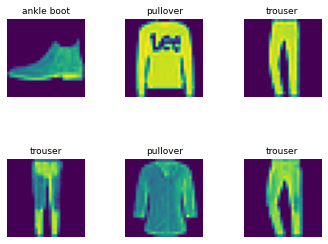

In [24]:
prediction_ch3(net, test_iter, n=6)